# Crimes in Chicago


##  About Dataset

### Context
This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to 2022. Data is provided by OneCampus Academy through Dr. Stanley Omeike. Should you have questions about this dataset, you may contact OneCampus Academy, or directly contact the Research & Development Division of the Chicago Police Department at 312.745.6071 or RDAnalysis@chicagopolice.org.

### Content

ID - Unique identifier for the record.

Case Number - The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.

Date - Date when the incident occurred. this is sometimes a best estimate.

Block - The partially redacted address where the incident occurred, placing it on the same block as the actual address.

IUCR - The Illinois Unifrom Crime Reporting code. This is directly linked to the Primary Type and Description. See the list of IUCR codes at https://data.cityofchicago.org/d/c7ck-438e.

Primary Type - The primary description of the IUCR code.

Description - The secondary description of the IUCR code, a subcategory of the primary description.

Location Description - Description of the location where the incident occurred.

Arrest - Indicates whether an arrest was made.

Domestic - Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.

Beat - Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts. See the beats at https://data.cityofchicago.org/d/aerh-rz74.

District - Indicates the police district where the incident occurred. See the districts at https://data.cityofchicago.org/d/fthy-xz3r.

Ward - The ward (City Council district) where the incident occurred. See the wards at https://data.cityofchicago.org/d/sp34-6z76.

Community Area - Indicates the community area where the incident occurred. Chicago has 77 community areas. See the community areas at https://data.cityofchicago.org/d/cauq-8yn6.

FBI Code - Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). See the Chicago Police Department listing of these classifications at http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html.

X Coordinate - The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

Y Coordinate - The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. This location is shifted from the actual location for partial redaction but falls on the same block.

Year - Year the incident occurred.

Updated On - Date and time the record was last updated.

Latitude - The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

Longitude - The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

Location - The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.

### Acknowledgements
I really want to say thank you to OneCampus Academy and Dr. Stanley Omeike for providing us this training platform free of charge, and also the tiredless efforts of Dr. Stanley Omeike in imparting unto us this all important skill of the century. God bless you sir and the entire team members. Amen!

### Motivation
A crime is an act (something you do) or omission (something you don't do) that is against the law and punishable upon conviction. But there are no adequate information on crime types and how it has occured over the years. Although, several investigations have provided us some insights. Still more investigations are required to provide insight on how crime has changed over the years. This study investigates the possibility of predicting where and when a crime will be committed, and Which areas of the city have been involved with crimes between the year 2001 to 2022. 

In [3]:
pip install wordcloud

# Import relevant packages for analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from os import path 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Pandas: Library used for data manipulation and analysis
# Numpy: Library with high-level mathematical functions
# Matplotlib: Library to plot graphs
# Seaborn: Library built on Matplotlib for visualisation

In [4]:
# Read in Dataframe
file = 'C:/Users/apple/Desktop/Remi Assignment/crime_data_Proj1.csv'
df = pd.read_csv(file)

In [5]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [6]:
#Display the size of the dataframe
df.size

52410698

In [7]:
#Display the columns of the dataframe
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [8]:
#Remove some unimportant columns for this study and keep the ones below. 
#Save the new dataframe with dfNew
dfNew = df.loc[:, ['Date', 'Block','Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'District', 'Year', 'Updated On']]

dfNew

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On
0,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,4.0,2008,02/28/2018 03:56:25 PM
1,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,4.0,2018,08/07/2018 04:02:59 PM
2,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,17.0,2007,02/28/2018 03:56:25 PM
3,07/23/2018 08:55:00 AM,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,11.0,2018,07/30/2018 03:52:24 PM
4,07/11/2021 06:40:00 AM,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,12.0,2021,07/18/2021 04:56:02 PM
...,...,...,...,...,...,...,...,...,...,...
2278721,10/14/2016 02:35:00 PM,006XX N CLARK ST,ASSAULT,SIMPLE,CONVENIENCE STORE,True,False,18.0,2016,02/10/2018 03:50:01 PM
2278722,09/11/2001 10:20:00 PM,052XX W LAKE ST,BATTERY,SIMPLE,RESIDENCE,False,True,15.0,2001,08/17/2015 03:03:40 PM
2278723,05/10/2006 07:49:00 PM,007XX E OAKWOOD BLVD,ASSAULT,SIMPLE,APARTMENT,False,True,2.0,2006,02/28/2018 03:56:25 PM
2278724,10/18/2017 10:30:00 PM,002XX W ERIE ST,CRIMINAL TRESPASS,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,18.0,2017,02/10/2018 03:50:01 PM


In [9]:
#Display the size of the new dataframe 
dfNew.size

22787260

In [10]:
#Display information of the new dataframe
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 10 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Block                 object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   District              float64
 8   Year                  int64  
 9   Updated On            object 
dtypes: bool(2), float64(1), int64(1), object(6)
memory usage: 143.4+ MB


In [11]:
#checking for missing values

dfNew.isna().sum()

Date                       0
Block                      0
Primary Type               0
Description                0
Location Description    2877
Arrest                     0
Domestic                   0
District                  12
Year                       0
Updated On                 0
dtype: int64

In [12]:
dfNew2 = dfNew.dropna()  #I am dropping the missing values
dfNew2                   #And saving it in a new dataframe dfNew2

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On
0,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,4.0,2008,02/28/2018 03:56:25 PM
1,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,4.0,2018,08/07/2018 04:02:59 PM
2,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,17.0,2007,02/28/2018 03:56:25 PM
3,07/23/2018 08:55:00 AM,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,11.0,2018,07/30/2018 03:52:24 PM
4,07/11/2021 06:40:00 AM,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,12.0,2021,07/18/2021 04:56:02 PM
...,...,...,...,...,...,...,...,...,...,...
2278721,10/14/2016 02:35:00 PM,006XX N CLARK ST,ASSAULT,SIMPLE,CONVENIENCE STORE,True,False,18.0,2016,02/10/2018 03:50:01 PM
2278722,09/11/2001 10:20:00 PM,052XX W LAKE ST,BATTERY,SIMPLE,RESIDENCE,False,True,15.0,2001,08/17/2015 03:03:40 PM
2278723,05/10/2006 07:49:00 PM,007XX E OAKWOOD BLVD,ASSAULT,SIMPLE,APARTMENT,False,True,2.0,2006,02/28/2018 03:56:25 PM
2278724,10/18/2017 10:30:00 PM,002XX W ERIE ST,CRIMINAL TRESPASS,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,18.0,2017,02/10/2018 03:50:01 PM


In [13]:
dfNew2.isna().sum()

Date                    0
Block                   0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
District                0
Year                    0
Updated On              0
dtype: int64

In [14]:
#checking for duplicates

dfNew2.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
2278721    False
2278722    False
2278723    False
2278724    False
2278725    False
Length: 2275837, dtype: bool

In [15]:
dfNew2.duplicated().any()

True

In [16]:
dfNew2.duplicated().sum()  #there are 2108 duplicates 

2108

In [17]:
dfNew3 = dfNew2.drop_duplicates(keep=False)   #dropping all the duplicates

dfNew3                                        #Saving the new dataframe in dfNew3

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On
0,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,4.0,2008,02/28/2018 03:56:25 PM
1,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,4.0,2018,08/07/2018 04:02:59 PM
2,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,17.0,2007,02/28/2018 03:56:25 PM
3,07/23/2018 08:55:00 AM,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,11.0,2018,07/30/2018 03:52:24 PM
4,07/11/2021 06:40:00 AM,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,12.0,2021,07/18/2021 04:56:02 PM
...,...,...,...,...,...,...,...,...,...,...
2278721,10/14/2016 02:35:00 PM,006XX N CLARK ST,ASSAULT,SIMPLE,CONVENIENCE STORE,True,False,18.0,2016,02/10/2018 03:50:01 PM
2278722,09/11/2001 10:20:00 PM,052XX W LAKE ST,BATTERY,SIMPLE,RESIDENCE,False,True,15.0,2001,08/17/2015 03:03:40 PM
2278723,05/10/2006 07:49:00 PM,007XX E OAKWOOD BLVD,ASSAULT,SIMPLE,APARTMENT,False,True,2.0,2006,02/28/2018 03:56:25 PM
2278724,10/18/2017 10:30:00 PM,002XX W ERIE ST,CRIMINAL TRESPASS,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,18.0,2017,02/10/2018 03:50:01 PM


In [18]:
dfNew3.duplicated().sum()

0

In [19]:
from dateutil.parser import parse
from datetime import datetime


tCol = dfNew3.Date

List = [(datetime.ctime(parse(x[0:-3])),x[-2:]) for x in tCol]
dayList = []
monthList = []
periodList = []
for row in List:
    day = row[0][0:4]
    month = row[0][4:7]
    if row[1]=='AM':
        period = 'Morning'
    elif row[1] =='PM' and int(row[0][11:13])<4:
        period = 'Afternoon'
    elif row[1] =='PM' and int(row[0][11:13])<6:
        period = 'Evening' 
    elif row[1] =='PM' and int(row[0][11:13])>5:
        period = 'Night'
    else:
        period = 'Unknown'
        
    dayList.append(day)
    monthList.append(month)
    periodList.append(period)
    
print(len(dayList), len(monthList), len(periodList))    

dfNew3['month'] = monthList
dfNew3['day'] = dayList
dfNew3['period']= periodList
dfNew3.head()

2271937 2271937 2271937


C:\Users\apple\AppData\Local\Temp/ipykernel_5740/263033759.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew3['month'] = monthList
C:\Users\apple\AppData\Local\Temp/ipykernel_5740/263033759.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew3['day'] = dayList
C:\Users\apple\AppData\Local\Temp/ipykernel_5740/263033759.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,month,day,period
0,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,4.0,2008,02/28/2018 03:56:25 PM,Jul,Sat,Afternoon
1,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,4.0,2018,08/07/2018 04:02:59 PM,Jul,Tue,Morning
2,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,17.0,2007,02/28/2018 03:56:25 PM,Apr,Fri,Morning
3,07/23/2018 08:55:00 AM,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,11.0,2018,07/30/2018 03:52:24 PM,Jul,Mon,Morning
4,07/11/2021 06:40:00 AM,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,12.0,2021,07/18/2021 04:56:02 PM,Jul,Sun,Morning


In [20]:
dfNew3.day.unique()

array(['Sat ', 'Tue ', 'Fri ', 'Mon ', 'Sun ', 'Wed ', 'Thu '],
      dtype=object)

In [21]:
wkList = []
for day in list(dfNew3.day):
    if day in ['Sat ', 'Sun ']:
        wkList.append('Weekend')
    else:
        wkList.append('Weekday')
dfNew3['dayType'] = wkList  

dfNew3

C:\Users\apple\AppData\Local\Temp/ipykernel_5740/1955403125.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew3['dayType'] = wkList


,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,month,day,period,dayType
0,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,4.0,2008,02/28/2018 03:56:25 PM,Jul,Sat,Afternoon,Weekend
1,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,4.0,2018,08/07/2018 04:02:59 PM,Jul,Tue,Morning,Weekday
2,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,17.0,2007,02/28/2018 03:56:25 PM,Apr,Fri,Morning,Weekday
3,07/23/2018 08:55:00 AM,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,11.0,2018,07/30/2018 03:52:24 PM,Jul,Mon,Morning,Weekday
4,07/11/2021 06:40:00 AM,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,12.0,2021,07/18/2021 04:56:02 PM,Jul,Sun,Morning,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278721,10/14/2016 02:35:00 PM,006XX N CLARK ST,ASSAULT,SIMPLE,CONVENIENCE STORE,True,False,18.0,2016,02/10/2018 03:50:01 PM,Oct,Fri,Afternoon,Weekday
2278722,09/11/2001 10:20:00 PM,052XX W LAKE ST,BATTERY,SIMPLE,RESIDENCE,False,True,15.0,2001,08/17/2015 03:03:40 PM,Sep,Tue,Night,Weekday
2278723,05/10/2006 07:49:00 PM,007XX E OAKWOOD BLVD,ASSAULT,SIMPLE,APARTMENT,False,True,2.0,2006,02/28/2018 03:56:25 PM,May,Wed,Night,Weekday
2278724,10/18/2017 10:30:00 PM,002XX W ERIE ST,CRIMINAL TRESPASS,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,18.0,2017,02/10/2018 03:50:01 PM,Oct,Wed,Night,Weekday


# ANALYSIS BY LOCATION 

We are going to group our data by specific locations (i.e Block and location description) and create a wordcloud based on the frequency of crimes occurring in that location. As an added visualization tool, we are mapping the wordcloud over the image of USA flag.

### 1. BLOCK

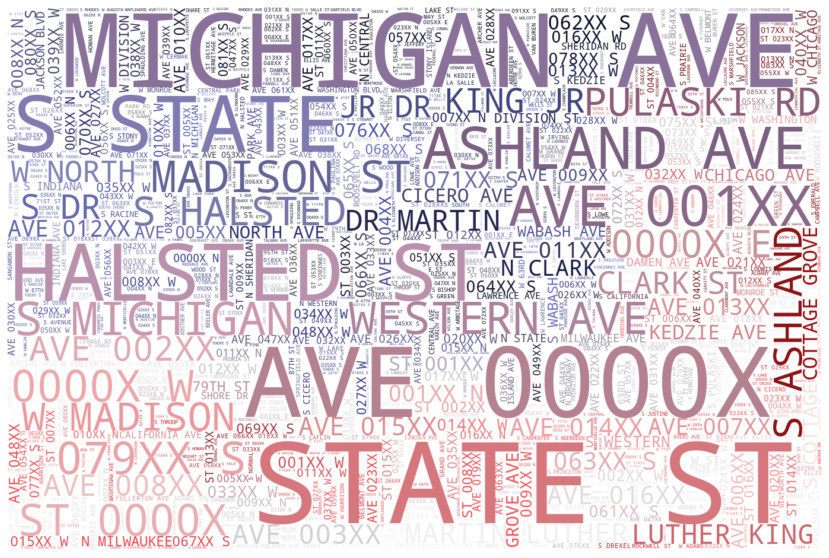

In [22]:
# Create string of Block codes and USA flag image mask
crime_types_location = " ".join(crime for crime in dfNew3["Block"])
mask = np.array(Image.open("C:/Users/apple/Desktop/Remi Assignment/us.jpg"))

# Create and generate a word cloud image
crime_location_wordcloud = WordCloud(background_color="white", mode="RGBA", 
                                    max_words=1000, mask=mask) .generate(crime_types_location)

# create coloring from image and plot wordcloud
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,10])
plt.imshow(crime_location_wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()

# From the Wordcloud of Crime Locations we are able to quickly know which avenues to avoid in Chicago 
# because of the higher frequency of crime occurrence.
# These places are: Michigan Ave, Halsted St, Ashland Ave, State St, Madison St, Pulaski Rd, 
# King Junior, Martin Luther king, Western Ave

### 2. LOCATION DESCRIPTION

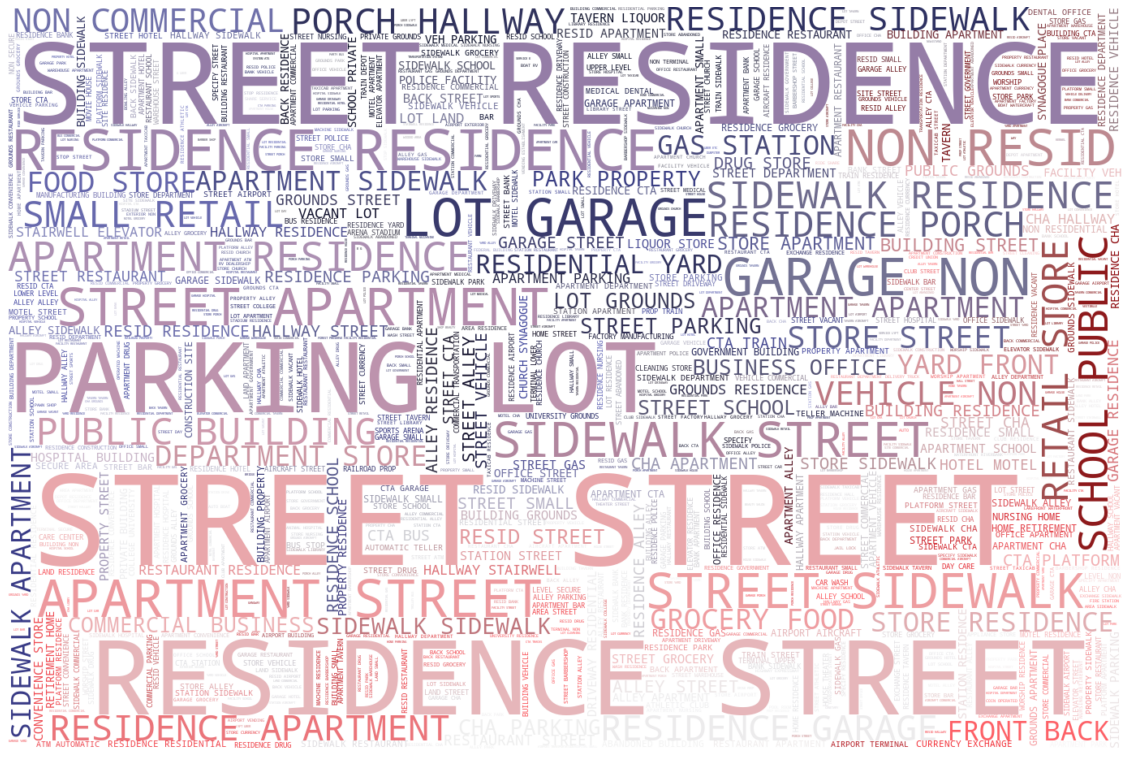

In [23]:
# Create string of Location description codes and USA flag image mask
crime_types_location = " ".join(crime for crime in dfNew3["Location Description"])
mask = np.array(Image.open("C:/Users/apple/Desktop/Remi Assignment/us.jpg"))

# Create and generate a word cloud image
crime_location_wordcloud = WordCloud(background_color="white", mode="RGBA", 
                                    max_words=1000, mask=mask) .generate(crime_types_location)

# create coloring from image and plot wordcloud
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.imshow(crime_location_wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()

# From the Wordcloud of Crime Locations we are able to quickly know which locations to avoid in Chicago 
# because of the higher frequency of crime occurrence.
# These location descriptions are: Street residence, sidewalk residence, small retail, apartment street, 
# residence porch, store residence, street school, Gas station, parking Lot, Residence garage, Grocery Food,
# Commercial business, Cha apartment, residence restaurant, residence grocery, Porch Hallway, Food store,
# Retail store, construction site, Lot garage, apartment sidewalk e.t.c

### 3. DISTRICT

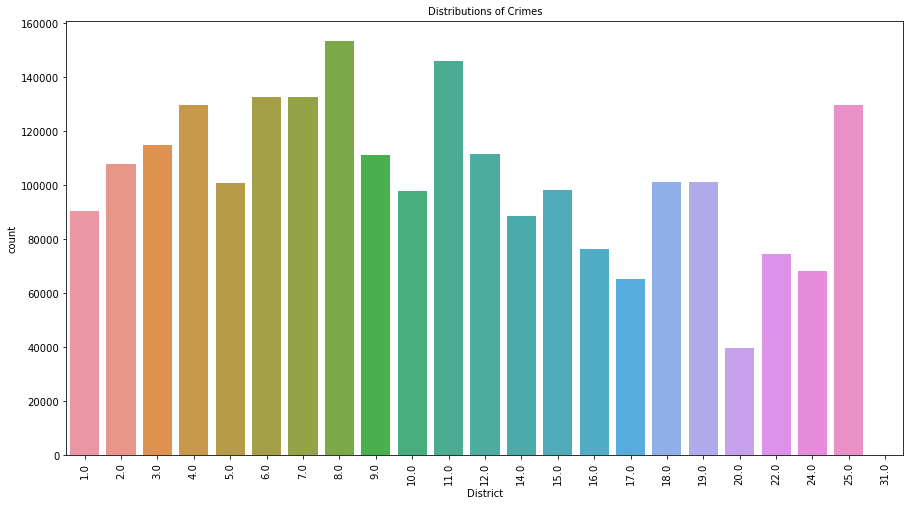

In [24]:
# figure size
plt.figure(figsize=(15,8))

#countplot
sb.countplot( x = 'District', data = dfNew3)

# title
plt.title('Distributions of Crimes', fontsize = 10)
plt.xticks(rotation = 90, fontsize = 10)
plt.show()


# Districts 8.0, 6.0, 11.0, 25.0, 7.0, 4.0 have high crime rate, more policemen should be deployed 
# in those district also. These areas could be more of residential areas.
# Meanwhile district 31.0 is the least affected area of crime. 

# ANALYSIS BY YEARLY CRIME TREND 



We are going to analyse the general trend of the crime data from year 2001-2022. In order to reduce processing time, we used a resampling method by month for the number of crimes. The resampling method in pandas is similar to the groupby method for a certain time span.

In [25]:
# check dataframe
dfNew3

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,month,day,period,dayType
0,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,4.0,2008,02/28/2018 03:56:25 PM,Jul,Sat,Afternoon,Weekend
1,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,4.0,2018,08/07/2018 04:02:59 PM,Jul,Tue,Morning,Weekday
2,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,17.0,2007,02/28/2018 03:56:25 PM,Apr,Fri,Morning,Weekday
3,07/23/2018 08:55:00 AM,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,11.0,2018,07/30/2018 03:52:24 PM,Jul,Mon,Morning,Weekday
4,07/11/2021 06:40:00 AM,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,12.0,2021,07/18/2021 04:56:02 PM,Jul,Sun,Morning,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278721,10/14/2016 02:35:00 PM,006XX N CLARK ST,ASSAULT,SIMPLE,CONVENIENCE STORE,True,False,18.0,2016,02/10/2018 03:50:01 PM,Oct,Fri,Afternoon,Weekday
2278722,09/11/2001 10:20:00 PM,052XX W LAKE ST,BATTERY,SIMPLE,RESIDENCE,False,True,15.0,2001,08/17/2015 03:03:40 PM,Sep,Tue,Night,Weekday
2278723,05/10/2006 07:49:00 PM,007XX E OAKWOOD BLVD,ASSAULT,SIMPLE,APARTMENT,False,True,2.0,2006,02/28/2018 03:56:25 PM,May,Wed,Night,Weekday
2278724,10/18/2017 10:30:00 PM,002XX W ERIE ST,CRIMINAL TRESPASS,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,18.0,2017,02/10/2018 03:50:01 PM,Oct,Wed,Night,Weekday


In [26]:
# convert dates to pandas datatime format
dfNew3.Date = pd.to_datetime(dfNew3.Date, format='%m/%d/%Y %I:%M:%S %p')

C:\Users\apple\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [27]:
dfNew3

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,month,day,period,dayType
0,2008-07-26 14:30:00,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,4.0,2008,02/28/2018 03:56:25 PM,Jul,Sat,Afternoon,Weekend
1,2018-07-31 10:57:00,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,4.0,2018,08/07/2018 04:02:59 PM,Jul,Tue,Morning,Weekday
2,2007-04-27 10:30:00,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,17.0,2007,02/28/2018 03:56:25 PM,Apr,Fri,Morning,Weekday
3,2018-07-23 08:55:00,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,11.0,2018,07/30/2018 03:52:24 PM,Jul,Mon,Morning,Weekday
4,2021-07-11 06:40:00,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,12.0,2021,07/18/2021 04:56:02 PM,Jul,Sun,Morning,Weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278721,2016-10-14 14:35:00,006XX N CLARK ST,ASSAULT,SIMPLE,CONVENIENCE STORE,True,False,18.0,2016,02/10/2018 03:50:01 PM,Oct,Fri,Afternoon,Weekday
2278722,2001-09-11 22:20:00,052XX W LAKE ST,BATTERY,SIMPLE,RESIDENCE,False,True,15.0,2001,08/17/2015 03:03:40 PM,Sep,Tue,Night,Weekday
2278723,2006-05-10 19:49:00,007XX E OAKWOOD BLVD,ASSAULT,SIMPLE,APARTMENT,False,True,2.0,2006,02/28/2018 03:56:25 PM,May,Wed,Night,Weekday
2278724,2017-10-18 22:30:00,002XX W ERIE ST,CRIMINAL TRESPASS,TO VEHICLE,PARKING LOT/GARAGE(NON.RESID.),False,False,18.0,2017,02/10/2018 03:50:01 PM,Oct,Wed,Night,Weekday


In [28]:
# Setting the index to be the date  
dfNew3.index = pd.DatetimeIndex(dfNew3.Date)

In [29]:
# Adding time_hour for easy grouping  
dfNew3['time_hour']= dfNew3['Date'].apply(lambda x : x.hour)
dfNew3['month'] = dfNew3['Date'].apply(lambda x : x.month)
dfNew3['year'] = dfNew3['Date'].apply(lambda x : x.year)

C:\Users\apple\AppData\Local\Temp/ipykernel_5740/4003856248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew3['time_hour']= dfNew3['Date'].apply(lambda x : x.hour)
C:\Users\apple\AppData\Local\Temp/ipykernel_5740/4003856248.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew3['month'] = dfNew3['Date'].apply(lambda x : x.month)
C:\Users\apple\AppData\Local\Temp/ipykernel_5740/4003856248.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [30]:
dfNew3

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,month,day,period,dayType,time_hour,year
Date,,,,,,,,,,,,,,,,
2008-07-26 14:30:00,2008-07-26 14:30:00,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,4.0,2008,02/28/2018 03:56:25 PM,7,Sat,Afternoon,Weekend,14,2008
2018-07-31 10:57:00,2018-07-31 10:57:00,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,4.0,2018,08/07/2018 04:02:59 PM,7,Tue,Morning,Weekday,10,2018
2007-04-27 10:30:00,2007-04-27 10:30:00,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,17.0,2007,02/28/2018 03:56:25 PM,4,Fri,Morning,Weekday,10,2007
2018-07-23 08:55:00,2018-07-23 08:55:00,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,11.0,2018,07/30/2018 03:52:24 PM,7,Mon,Morning,Weekday,8,2018
2021-07-11 06:40:00,2021-07-11 06:40:00,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,12.0,2021,07/18/2021 04:56:02 PM,7,Sun,Morning,Weekend,6,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-14 14:35:00,2016-10-14 14:35:00,006XX N CLARK ST,ASSAULT,SIMPLE,CONVENIENCE STORE,True,False,18.0,2016,02/10/2018 03:50:01 PM,10,Fri,Afternoon,Weekday,14,2016
2001-09-11 22:20:00,2001-09-11 22:20:00,052XX W LAKE ST,BATTERY,SIMPLE,RESIDENCE,False,True,15.0,2001,08/17/2015 03:03:40 PM,9,Tue,Night,Weekday,22,2001
2006-05-10 19:49:00,2006-05-10 19:49:00,007XX E OAKWOOD BLVD,ASSAULT,SIMPLE,APARTMENT,False,True,2.0,2006,02/28/2018 03:56:25 PM,5,Wed,Night,Weekday,19,2006


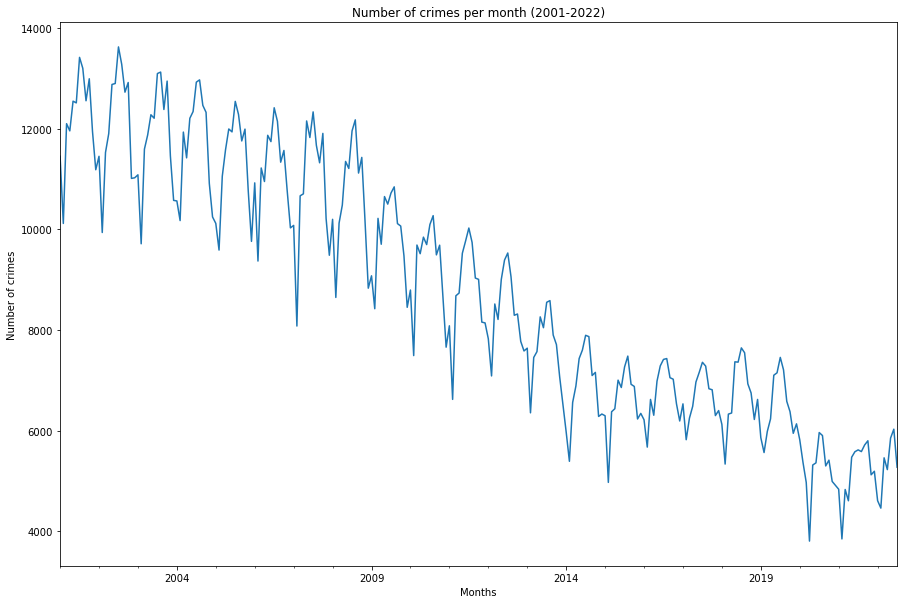

In [31]:
plt.figure(figsize=(15,10))

# resampling time series by months
dfNew3.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month (2001-2022)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

# Frequency of Crimes Per Month (2001 to 2022)

# From the trend below, we can see that the frequency of crimes in Chicago decreases from 2001 to 2022 
# with seasonal peaks. To unveil the seasonal peak, we would proceed to periodic insight.

### 1. Using the Univariate Analysis to uncover crimes during weekly periods

<AxesSubplot:xlabel='dayType', ylabel='count'>

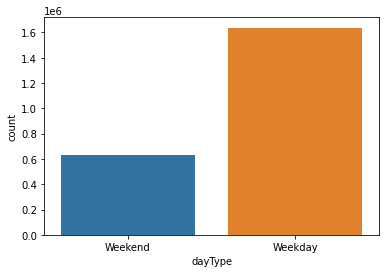

In [32]:
# Using the Univariate Analysis to uncover crimes during weekly periods
sb.countplot(x ='dayType', data = dfNew3)

#Insights
# It is shown below that most of the crimes occur during the weekdays, that is between Monday to Friday
# most people will be at their place of work, its likely that the crimes are commited by unemployed or
#self employed individuals

### 2. Using the Univariate Analysis to uncover crimes during time of the day

<AxesSubplot:xlabel='period', ylabel='count'>

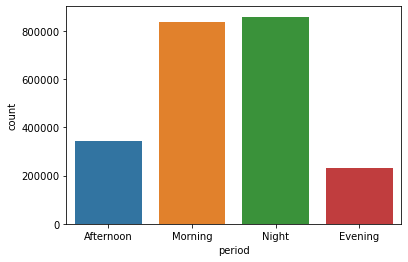

In [33]:
# Using the Univariate Analysis to uncover crimes during timing of the day
sb.countplot(x ='period', data = dfNew3)

#Insights
#It is shown below that most crimes occur at morning and at night, 
# this shows that before these individuals leave for work or when they come back from work, the crimes are committed

### 3. Using the Univariate Analysis to uncover crimes during days of the week

<AxesSubplot:xlabel='day', ylabel='count'>

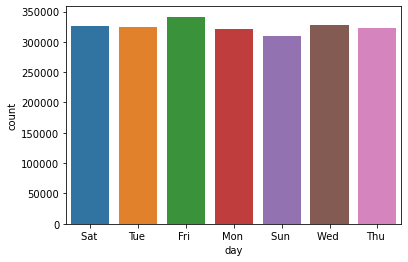

In [34]:
# Using the Univariate Analysis to uncover crimes during days of the week
sb.countplot(x ='day', data = dfNew3)

#Insights
#As shown below, although the earlier graph shows that majority of the crime occur during the weekday
#it might be like that because there are 5 working days which is more that 2 days for the weekend
#also,Friday seems to be slightly higher than the rest of the days. except for sunday. 
#I'd say majority of the crimes are carried out by those who are likely unemployed

### 4. Using the Univariate Analysis to uncover crimes during months (1-12, Jan. - Dec.)

<AxesSubplot:xlabel='month', ylabel='count'>

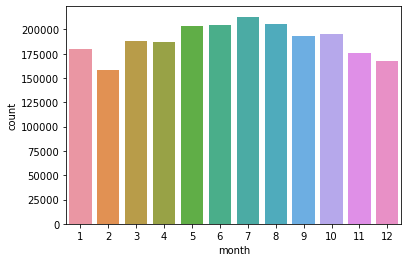

In [35]:
# Using the Univariate Analysis to uncover crimes during months (1-12, Jan-Dec)
sb.countplot(x ='month', data = dfNew3)

# Insights
# As shown below, December (12) and febuary (2) are the lowest crime month, 
# Febuary is 28 days and December is festive period

### 5. Using Univariate Analysis to uncover the rate of Arrest

<AxesSubplot:xlabel='Arrest', ylabel='count'>

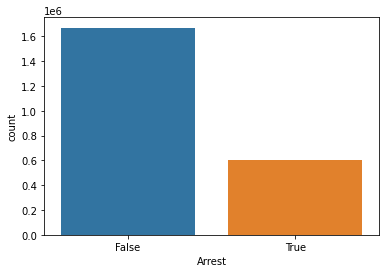

In [36]:
# To uncover the rate of Arrest
sb.countplot(x ='Arrest', data = dfNew3)

#Insights
#As shown below, for most of the crimes, no arrest was made
#It can be deduced that the crimes were updated on most of the times. There were not so much new crimes

### 6. Using Univariate Analysis to uncover the domestic-related rate of crime incident 

<AxesSubplot:xlabel='Domestic', ylabel='count'>

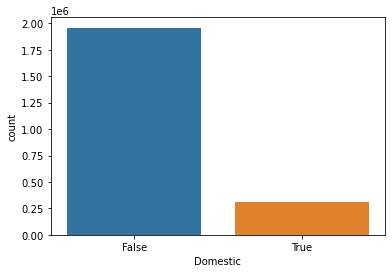

In [37]:
#Uncover the domestic-related rate of crime incident 
sb.countplot(x ='Domestic', data = dfNew3)

# Insight
# It is shown below that most of the crime incident were less domestic-related.

### 7. Using Multivariate Analysis to uncover Individual Yearly Crime Trends from 2001 to 2022

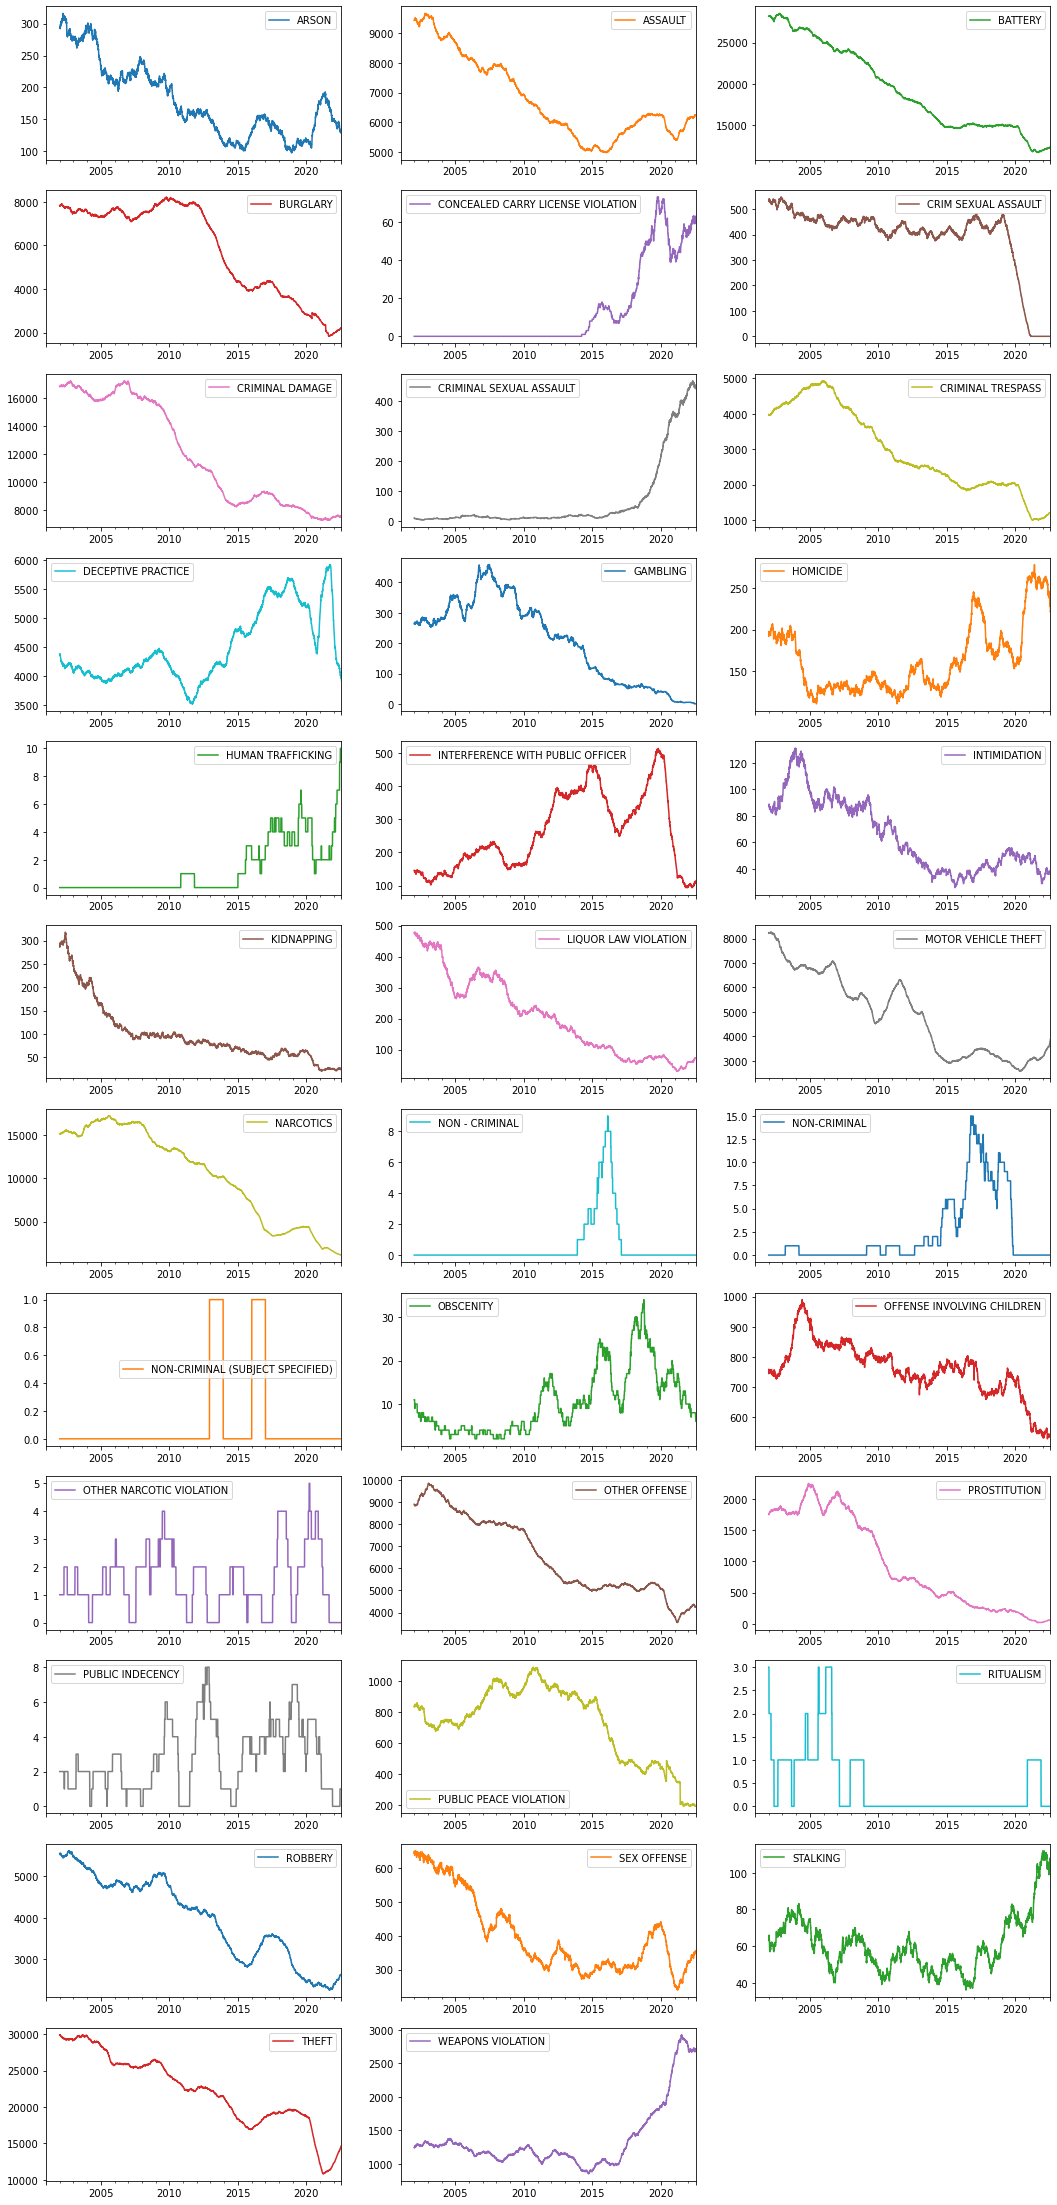

In [38]:
# Next, we focus on the frequency trends for each crime with the rolling sum graph.

crimes_count_date = dfNew3.pivot_table('Block', aggfunc=np.size, columns='Primary Type',
                                  index=dfNew3.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plot = crimes_count_date.rolling(365).sum() .plot(figsize=(18,40), subplots=True,
                                                 layout=(-1,3), sharex=False, sharey=False)

# Insight
# Individual Yearly Crime Trends (2001 to 2022)

# As shown below, we can notice that the following crimes have an increasing trend 
# although the general trend of crimes is decreasing.

### 8. Analysis to Uncover the rate of Occurence of Primary-Type crime 

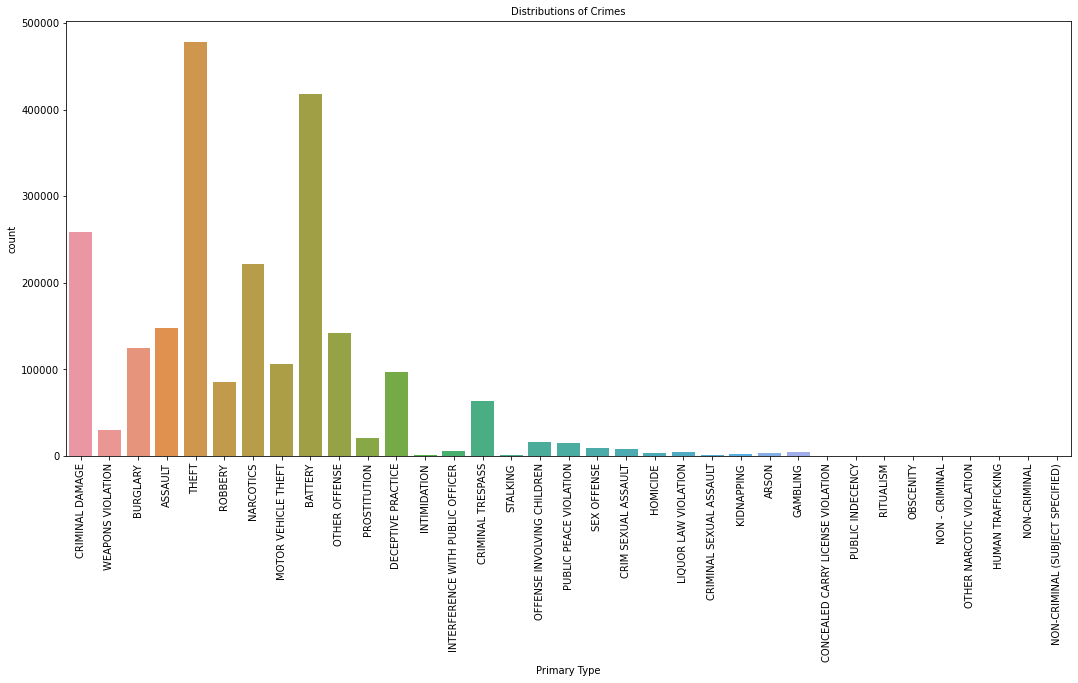

In [39]:
# figure size
plt.figure(figsize=(18,8))

#countplot
sb.countplot( x = 'Primary Type', data = dfNew3)

# title
plt.title('Distributions of Crimes', fontsize = 10)
plt.xticks(rotation = 90, fontsize = 10)
plt.show()


# Insights
# As shown below, theft and battery, these will occur more on the streets. and since less arrests are been made, 
# the crimes keep coming more. The police need to patrol the streets more and also go for more training
# or install survelliance cameras to make sure that arrests are acctually been made

# ANALYSIS BY MONTHLY AND HOURLY CRIME TREND 
From the figure above, we are going to specifically focus on the high-frequency crimes with a rising trend. 
We first filter the dataset of crimes, group them by the hour of the day, and subsequently plotting them based on the frequency of occurrence.

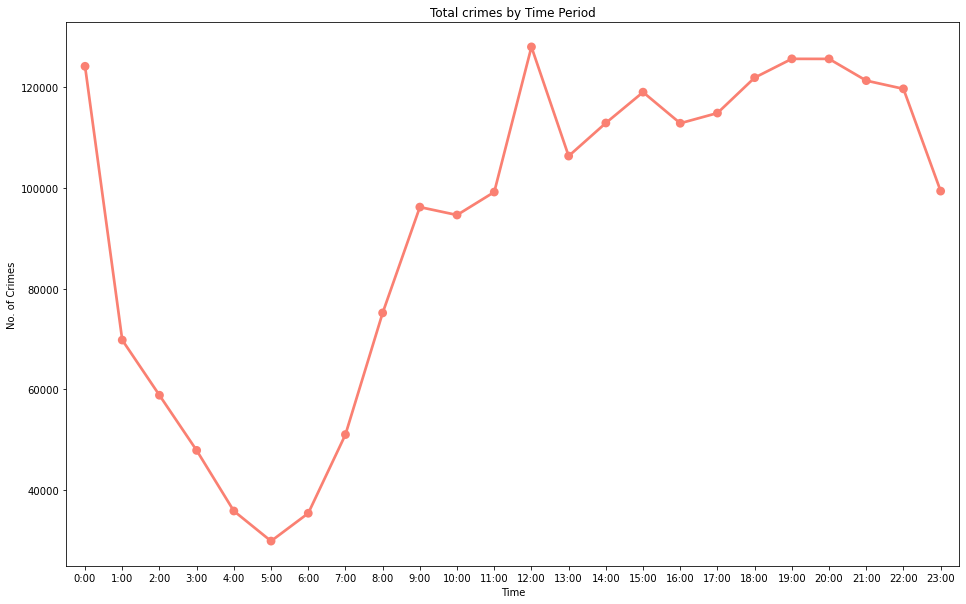

In [40]:
# just to see the overall crime trend by hourly periods, we can see which timings have the highest amount of crime 
crimes_by_time = dfNew3.copy()

# Define our important top crime types according to the frequency trends of each crime
primary_types = ["CRIMINAL DAMAGE", "WEAPONS VIOLATION", "BURGLARY", "ASSAULT", "THEFT","ROBBERY","NARCOTICS", 
                 "MOTOR VEHICLE THEFT", "BATTERY", "OTHER OFFENSE", "PROSTITUTION", "DECEPTIVE PRACTICE",
                 "CRIMINAL TRESPASS", "OFFENSE INVOLVING CHILDREN", "PUBLIC PEACE VIOLATION"]

# Filter out rows with only the top crimes mentioned above
crimes_by_time = crimes_by_time[crimes_by_time['Primary Type'].isin(primary_types)]

# Group crimes by time hour
crimes_by_time = crimes_by_time.groupby('time_hour').size().reset_index(name='No. of Crimes')
crimes_by_time['hours']=crimes_by_time['time_hour'].apply(lambda x: str(x)+':00')

# Plot crimes by time period
fig = plt.figure(figsize=(16, 10))
sb.pointplot(data=crimes_by_time, x="hours",y="No. of Crimes", color="salmon")

# Set labels & title
plt.xlabel('Time')
plt.ylabel('No. of Crimes')
plt.title('Total crimes by Time Period')
plt.show()


# Hourly Crime Frequency

# As shown below, crime happens mostly during daytime between the 11:00 to 13:00 hrs and dips in the early morning. 
# Perhaps it would be better to do a comparison of the ratio of people who are awake vs people who are committing crime, 
# the ratio might be higher in the early morning. Sadly, we have no data on this.
# Nevertheless, it tells citizens and policemen alike when to be more careful throughout the day. 
# We can also further narrow down each crime based on crime type.

<AxesSubplot:title={'center':'No. of Crimes by Type'}, xlabel='time_hour'>

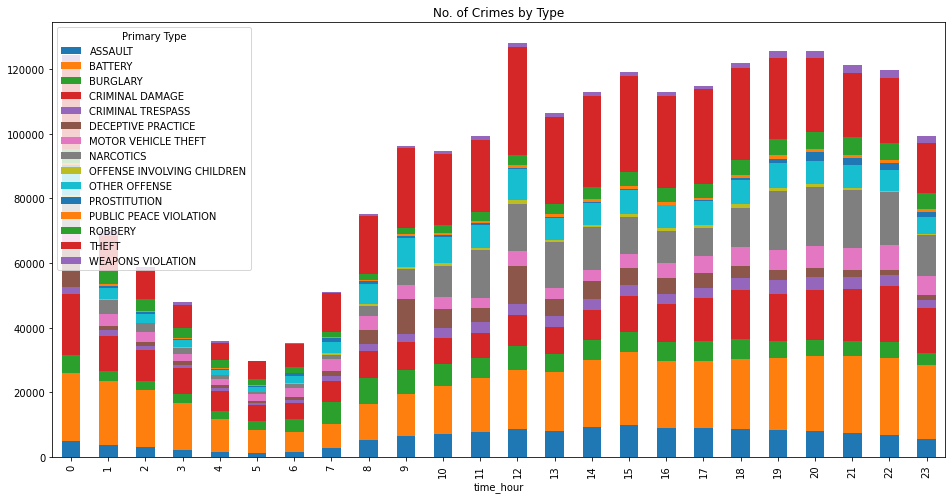

In [41]:
# Group Crimes by type
crimes_by_type = dfNew3.copy()
crimes_by_type = crimes_by_type[crimes_by_type['Primary Type'].isin(primary_types)]
crimes_by_type = crimes_by_type.groupby(['time_hour','Primary Type']).size().reset_index(name='No. of Crimes')

# Format hour data
crimes_by_type['hours'] = crimes_by_type['time_hour'].apply(lambda x: str(x)+':00')

# Create crime type pivot table
crimes_by_type_pivot = pd.pivot_table(crimes_by_type, index=['time_hour'], columns=['Primary Type'],
                                     values='No. of Crimes', aggfunc=np.sum)

# Create stacked bar chart of crime types, compared hourly 
crimes_by_type_pivot.plot(kind='bar', stacked=True, figsize=(16,8),
                         title="No. of Crimes by Type")


# Insight
# Hourly Crime Frequency by Crime Types

# As shown below, looking at the trends across the time periods, each crime type seems to have similar proportions 
# within each hour. Theft and Criminal Damage form a significant portion of crimes committed. 
# Criminal damage happen more often during day-time, perhaps being linked to white-collar crimes with arrests 
# that happen during office hours.

# Next, we are going to analyze the trend for monthly crimes by grouping the same data by month.

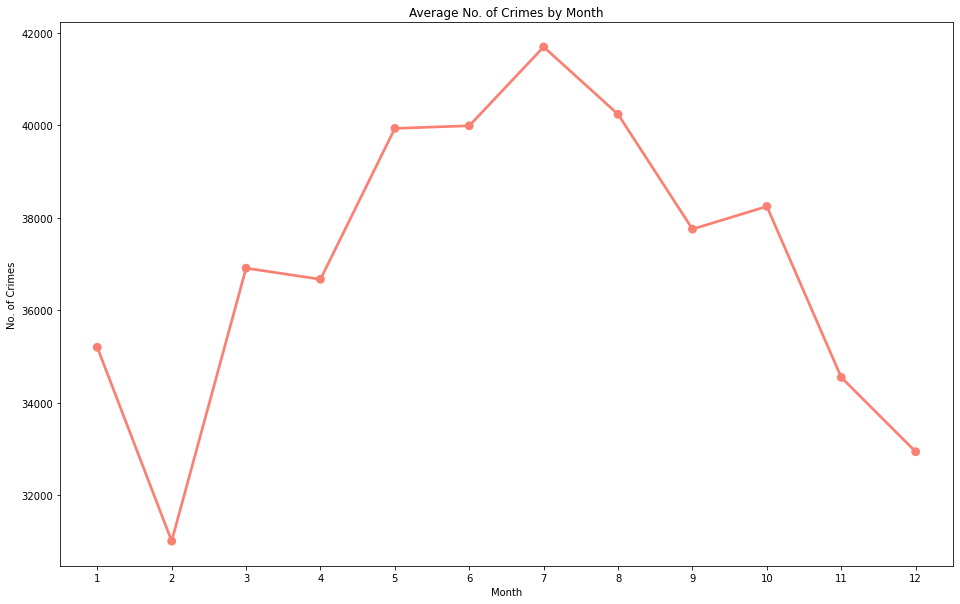

In [42]:
# Do the same plot for crimes by month, group crimes by month
crimes_by_month = dfNew3.copy()
crimes_by_month = crimes_by_month[crimes_by_month['Primary Type'].isin(primary_types)]
crimes_by_month = crimes_by_month.groupby('month').size().reset_index(name='No. of Crimes')

# Divide each monthly totall by 5 Years to get the average crime count
crimes_by_month['month (average)'] = crimes_by_month['No. of Crimes'].apply(lambda x: x/5)

# Plot crimes by month 
fig = plt.figure(figsize=(16, 10))
sb.pointplot(data=crimes_by_month, x='month', y='month (average)',color="salmon")

# Set labels & title
plt.xlabel('Month')
plt.ylabel('No. of Crimes')
plt.title('Average No. of Crimes by Month')
plt.show()


# Insight
# Monthly Crime Frequency

# Based on the monthly crime rates, we can see from below that crimes dip in February and spikes in July. 
# For tourists, this could be useful travel information, and for the police department, 
# this data tells them which months to be on high alert.

# RATIO OF CRIME ARREST BASED ON CRIME TYPES
Using the same data of high-frequency crimes with rising trends, we are looking into the proportion of arrest for each crime. This time, we group the data by crime type and arrest, then we retrieve the ratio between true and false arrest.

<AxesSubplot:title={'center':'No. of Crimes by Type'}, ylabel='Primary Type'>

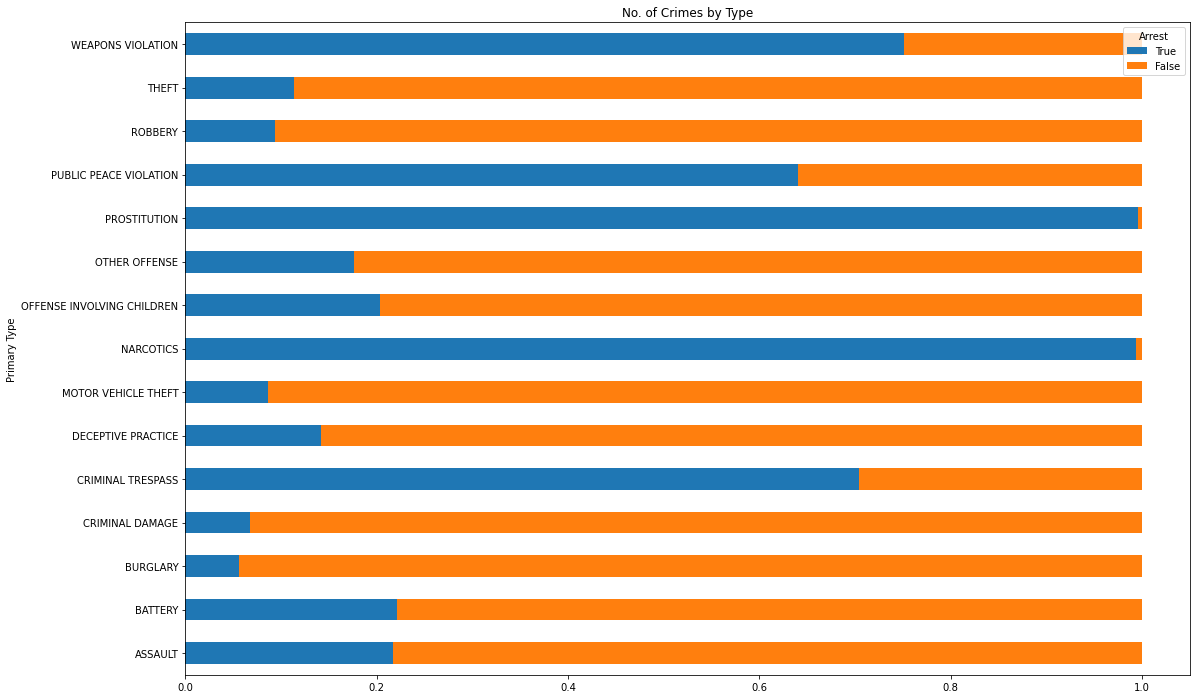

In [43]:
# Group by crime primary types and arrest
crimes_by_arrest = dfNew3.copy()
crimes_by_arrest = crimes_by_arrest.groupby(['Primary Type','Arrest']).size().reset_index(name='No. of Crimes')

# Filter for top crime primary types mentioned earlier
crimes_by_arrest = crimes_by_arrest[crimes_by_arrest['Primary Type'].isin(primary_types)]

# Create Pivot table
crimes_by_arrest_pivot = pd.pivot_table(crimes_by_arrest, index=['Primary Type'], 
                                       columns=['Arrest'], values='No. of Crimes', aggfunc=np.sum)
crimes_by_arrest_pivot = crimes_by_arrest_pivot.reset_index()

# Create new columns in pivot table: ["Total No."], ["True"], ["False"]
crimes_by_arrest_pivot['Total No'] = crimes_by_arrest_pivot[True] + crimes_by_arrest_pivot[False]
crimes_by_arrest_pivot['True'] = crimes_by_arrest_pivot[True] / crimes_by_arrest_pivot['Total No']
crimes_by_arrest_pivot['False'] = crimes_by_arrest_pivot[False] /crimes_by_arrest_pivot['Total No']
crimes_by_arrest_pivot = crimes_by_arrest_pivot[['Primary Type', 'True', 'False']]
crimes_by_arrest_pivot = crimes_by_arrest_pivot.set_index('Primary Type')

# Plot stacked bar chart of Arrest Success for the top different crimes
crimes_by_arrest_pivot.plot(kind='barh', stacked=True, figsize =(18,12), title="No. of Crimes by Type")


# Insight
# Crimes Arrest Ratio

# This analysis clearly tells us that crimes involving "Prostitution", "Narcotics", “Weapons Violation” 
# "Public Peace Violation", & "Criminal Trespass" have a high arrest count. 
# However, for the other crime types, the Chicago police department might want to look into better ways of 
# tackling investigations.There is also a possibility of false reports and allegations.

# ANALYSIS OF MAJOR CRIMES MONTHLY ARREST 
In this part, we will look at the major crimes based on the number of arrests. We will have to extract the top crimes based on type and description. This is a more specific analysis since we are focusing on the description of the crimes as well.

In [44]:
# Concatenation ["Primary Type"] & ["Description"] together to make a new column
dfNew3['Details'] = dfNew3['Primary Type'] + ', ' + dfNew3['Description']

# Group by crime details and show top crimes with highest arrest rates
top_crimes = dfNew3.groupby(['Details']) ['Arrest'] .count()
top_crimes = pd.DataFrame(top_crimes) .nlargest(14, 'Arrest') .reset_index()
top_crimes = list(top_crimes['Details'])
top_crimes

C:\Users\apple\AppData\Local\Temp/ipykernel_5740/3193232729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew3['Details'] = dfNew3['Primary Type'] + ', ' + dfNew3['Description']


['THEFT, $500 AND UNDER',
 'BATTERY, DOMESTIC BATTERY SIMPLE',
 'BATTERY, SIMPLE',
 'CRIMINAL DAMAGE, TO VEHICLE',
 'CRIMINAL DAMAGE, TO PROPERTY',
 'THEFT, OVER $500',
 'ASSAULT, SIMPLE',
 'MOTOR VEHICLE THEFT, AUTOMOBILE',
 'BURGLARY, FORCIBLE ENTRY',
 'NARCOTICS, POSS: CANNABIS 30GMS OR LESS',
 'THEFT, FROM BUILDING',
 'THEFT, RETAIL THEFT',
 'OTHER OFFENSE, TELEPHONE THREAT',
 'CRIMINAL TRESPASS, TO LAND']

In [45]:
dfNew3

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On,month,day,period,dayType,time_hour,year,Details
Date,,,,,,,,,,,,,,,,,
2008-07-26 14:30:00,2008-07-26 14:30:00,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,4.0,2008,02/28/2018 03:56:25 PM,7,Sat,Afternoon,Weekend,14,2008,"CRIMINAL DAMAGE, TO VEHICLE"
2018-07-31 10:57:00,2018-07-31 10:57:00,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,4.0,2018,08/07/2018 04:02:59 PM,7,Tue,Morning,Weekday,10,2018,"WEAPONS VIOLATION, UNLAWFUL POSS AMMUNITION"
2007-04-27 10:30:00,2007-04-27 10:30:00,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,17.0,2007,02/28/2018 03:56:25 PM,4,Fri,Morning,Weekday,10,2007,"BURGLARY, FORCIBLE ENTRY"
2018-07-23 08:55:00,2018-07-23 08:55:00,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,11.0,2018,07/30/2018 03:52:24 PM,7,Mon,Morning,Weekday,8,2018,"ASSAULT, SIMPLE"
2021-07-11 06:40:00,2021-07-11 06:40:00,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,12.0,2021,07/18/2021 04:56:02 PM,7,Sun,Morning,Weekend,6,2021,"ASSAULT, AGGRAVATED - HANDGUN"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-10-14 14:35:00,2016-10-14 14:35:00,006XX N CLARK ST,ASSAULT,SIMPLE,CONVENIENCE STORE,True,False,18.0,2016,02/10/2018 03:50:01 PM,10,Fri,Afternoon,Weekday,14,2016,"ASSAULT, SIMPLE"
2001-09-11 22:20:00,2001-09-11 22:20:00,052XX W LAKE ST,BATTERY,SIMPLE,RESIDENCE,False,True,15.0,2001,08/17/2015 03:03:40 PM,9,Tue,Night,Weekday,22,2001,"BATTERY, SIMPLE"
2006-05-10 19:49:00,2006-05-10 19:49:00,007XX E OAKWOOD BLVD,ASSAULT,SIMPLE,APARTMENT,False,True,2.0,2006,02/28/2018 03:56:25 PM,5,Wed,Night,Weekday,19,2006,"ASSAULT, SIMPLE"


In [56]:

dfNew4 = dfNew3.groupby(['Details', 'month']) ['Arrest'] .count()

In [57]:
dfNew4

Details                                           month
ARSON, AGGRAVATED                                 1         52
                                                  2         40
                                                  3         56
                                                  4         43
                                                  5         54
                                                          ... 
WEAPONS VIOLATION, UNLAWFUL USE/SALE AIR RIFLE    10       110
                                                  11        66
                                                  12        42
WEAPONS VIOLATION, USE OF METAL PIERCING BULLETS  1          1
                                                  11         1
Name: Arrest, Length: 5450, dtype: int64

<AxesSubplot:title={'center':'Major crimes (January - December)'}, xlabel='month', ylabel='Details'>

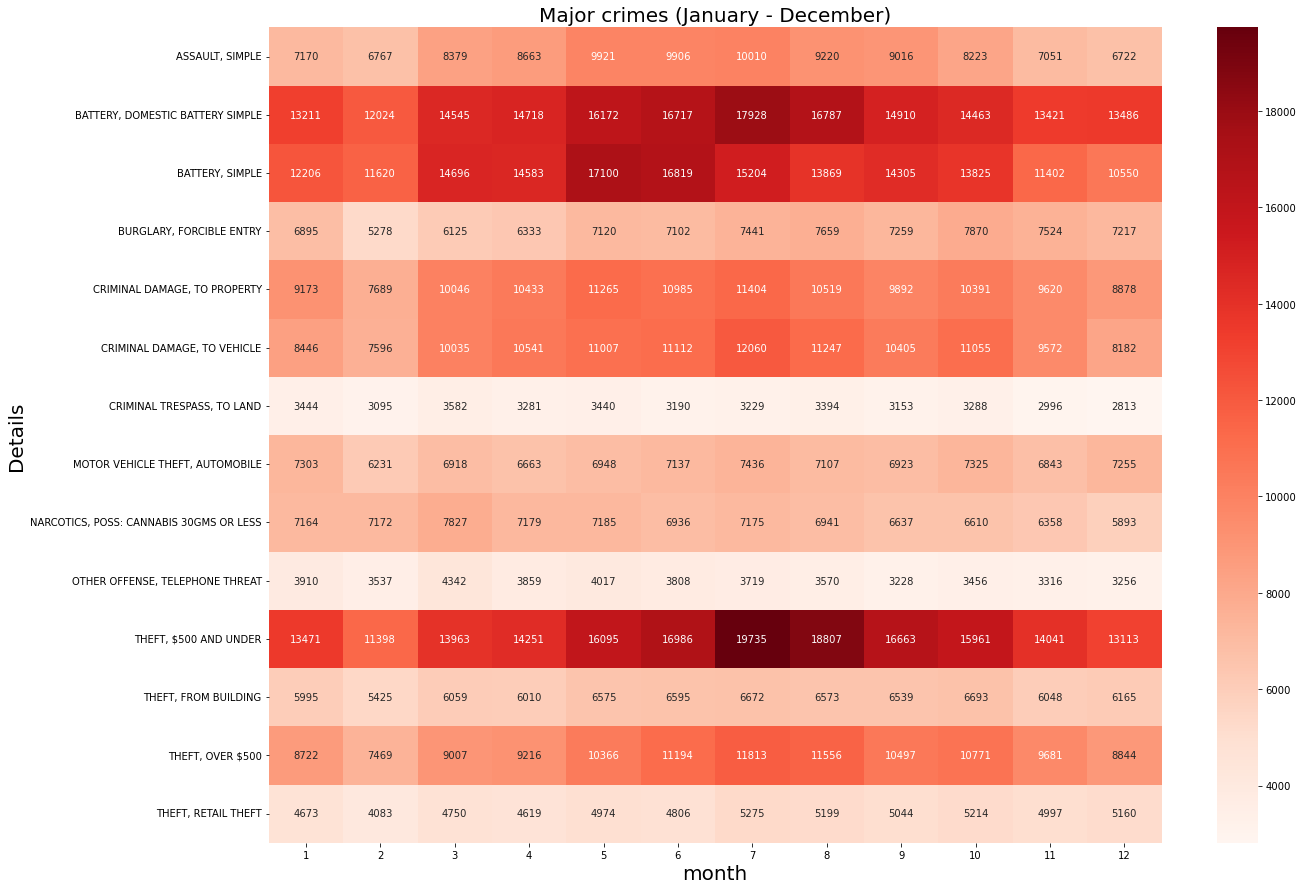

In [60]:
dfNew4 = dfNew3.groupby(['Details', 'month']) ['Arrest'] .count()

# Chart formatting
DIMS = (20, 15)
fig = plt.figure(figsize=DIMS)
ax1 = fig.add_subplot(111)
ax1.set_title('Major crimes (January - December)', fontsize=20)
ax1.set_ylabel('Details', fontsize=20)
ax1.set_xlabel('month', fontsize=20)

# Get top 20 data
dfNew4 = pd.DataFrame(dfNew4).reset_index()
dfNew4 = dfNew4[dfNew4['Details'].isin(top_crimes)]

# Pivot data to 2D table, and fill all na values
dfNew4 = dfNew4.pivot_table(index='Details', columns='month', values='Arrest')
dfNew4.fillna(0, inplace=True)

# Create heatmap
sb.heatmap(dfNew4, cmap="Reds", annot=True, fmt='g')


# Insight

# Major Crimes by Months

# From the heatmap below, we can see that theft under 500, domestic and simple battery are the most frequently 
# occurred crimes in Chicago based on arrest counts. 
# Each of these crimes has slightly different peak months, but they are all within the summer months.

# INSIGHTS AND EVALUATIONS

1. Higher trend of crime during the summer months

A similar trend we see across our analysis shows that crime rates spike from July – August during the summer period. Some researchers reason that increased temperatures from the increased daylight hours can lengthen the amount of time people spend away from their homes, increasing the number of people in public and the amount of time that homes are left empty, creating a greater possibility of criminal activities.

Others point to the effect of students on summer vacation, who are otherwise occupied with schooling during other seasons; whereas others postulate that heat-induced discomfort could also make people more aggressive and is more likely to act out.

Numerous studies have shown that rates of criminal behavior among teens and young adults drop when their communities provide them with other ways to spend their time and earn money. This was found to be true in Los Angeles during several time periods, where gang activity in poor communities was reduced when community centres for teens where thriving and active. Similarly, a 2013 study conducted by the University of Chicago Crime Lab found that participation in a summer jobs program slashed the arrest rate for violent crimes by more than half among teens and young adults who were at a high risk for committing crime.

Taking these facts into consideration, it seems clear that the problem is not that more people are out and about during the summer months, but that they are out and about in unequal societies that are not providing for their needs. Crime might spike at a time when a greater concentration of people being in public together simultaneously, and leaving their homes unattended, but that is not why crime exists.

Reference

    https://www.foxweather.com/lifestyle/summer-crime-wave
    https://www.newsnationnow.com/rush-hour/heat-of-the-moment-why-does-violent-crime-spike-in-the-summer/
   

2. Gun related incidents are frequently reported with high arrest rates

From our analysis, we can see that assault and robbery with handguns are the most highly reported incidents in Chicago. This is unsurprising given that (1) United states owns nearly half of the world’s civilians’ handguns, (2) Americans own more guns per capita compared to any other country, (3) America holds 31% of global mass shooter, (4) Gun homicides in America are 25.2 times higher than other high-income countries.

This is also coupled with the fact that gun violence is more likely to lead to fatality and people are more inclined to report gun violence as compared to theft or battery. Gun violence also has a higher arrest rate as it is hard for the perpetrators to deny the charges or escape the scene with a larger number of local police looking for the suspects.

Reference:

    https://edition.cnn.com/2017/10/03/americas/us-gun-statistics/index.html
    

3. Overall Crime rates have been falling

Crime rates are falling over the year, police attributed the drop to putting more officers on the streets, investing in new technology and a smarter policing strategy.“Chicago Police Department now has data-driven command hubs known as Strategic Decision Support Centres in 12 of the department’s 22 districts. The centers link gunshot detection sensors and video to a system that can rapidly alert cops in the field to a shooting and identify potential suspects. The centers, operated by police and civilians from the University of Chicago Crime Lab, employ a predictive computer program called HunchLab to look at data such as crime incidents and proximity to liquor stores and gas stations. The software anticipates hot spots and suggests the deployment of officers to prevent retaliatory shootings.”

Of course, this is not to mean all crime types have seen falling crime rates. Some crimes such as stalking, theft and sexual assault still see a rising trend. The CPD needs to be aware of these incidents and take appropriate actions.

Reference:

    https://www.chicagotribune.com/opinion/editorials/ct-edit-homicide-chicago-police-gun-violence-20180417-story.html
    https://www.reuters.com/article/us-crime-chicago/chicago-homicides-fall-16-percent-in-2017-idUSKBN1EQ18F
    